In [8]:
import pandas as pd
import psycopg2
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

# Read DB connection info
db_user = os.getenv("db_user")
db_password = os.getenv("db_password")
db_host = os.getenv("db_host")
db_port = os.getenv("db_port")
db_database = os.getenv("db_database")

# Connect to database
conn = psycopg2.connect(
    dbname=db_database,
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port
)

# Load table into DataFrame
df = pd.read_sql_query("SELECT * FROM generation_history_v4 WHERE src = 'model_test';", conn)

# Close connection
conn.close()



C:\Users\w10\AppData\Local\Temp\ipykernel_8572\2295911672.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM generation_history_v4 WHERE src = 'model_test';", conn)


In [9]:
df

,id,src,gen_id,gen_timestamp,caller_address,model,system_prompt,prompt,gen_text,prompt_eval_count,eval_count,load_duration,prompt_eval_duration,eval_duration,temperature
0,164cb537-e165-4fdb-9595-ea35531173af,model_test,gemma3:4b_2025-07-02T10:36:46.323383,2025-07-02T10:36:46.323383,192.168.1.69,gemma3:4b,,tell me a 700 word story about a dog,The rain in Havenwood always smelled of pine a...,26,919,1.68,0.20,34.66,0.0
1,aa692ba8-4408-4a89-926f-789ce6b73df3,model_test,gemma3:4b_2025-07-02T10:37:22.889757,2025-07-02T10:37:22.889757,192.168.1.69,gemma3:4b,,tell me a 700 word story about a dog,The rain in Havenwood always smelled of pine a...,26,919,1.67,0.21,34.30,0.0
2,df36747e-96ae-45e2-ac6c-84fe99a00428,model_test,gemma3:4b_2025-07-02T10:37:59.096453,2025-07-02T10:37:59.096453,192.168.1.69,gemma3:4b,,tell me a 700 word story about a dog,The rain in Havenwood always smelled of pine a...,26,919,1.66,0.20,34.44,0.0
3,1d18b292-9a17-4080-ba7d-e4a91cc7869b,model_test,gemma3:4b_2025-07-02T10:38:35.428750,2025-07-02T10:38:35.428750,192.168.1.69,gemma3:4b,,tell me a 700 word story about a dog,The rain in Havenwood always smelled of pine a...,26,919,1.67,0.22,34.86,0.0
4,d7737142-b9c1-47bf-9b3c-cb6ef1c53cd4,model_test,gemma3n:e2b_2025-07-02T10:39:12.206528,2025-07-02T10:39:12.206528,192.168.1.69,gemma3n:e2b,,tell me a 700 word story about a dog,## The Whispering Wind and the Old Oak Barnab...,26,1077,2.90,0.26,56.89,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2e4bb01e-cf6d-42cc-b822-c8ad9fc5044e,model_test,gemma3n:e2b_2025-07-02T10:09:21.625410,2025-07-02T10:09:21.625410,192.168.1.69,gemma3n:e2b,,tell me a 500 word story about a dog,Barnaby wasn't your typical golden retriever. ...,26,830,2.63,0.32,43.12,0.0
132,f6c32d70-1a11-4f2a-b7d0-b42dab80d71a,model_test,gemma3n:e2b_2025-07-02T10:10:07.739116,2025-07-02T10:10:07.739116,192.168.1.69,gemma3n:e2b,,tell me a 500 word story about a dog,Barnaby wasn't your typical golden retriever. ...,26,830,2.78,0.26,43.50,0.0
133,2c0e761b-6762-4fba-9c7f-bf98ba8f718f,model_test,gemma3n:e2b_2025-07-02T10:10:54.311247,2025-07-02T10:10:54.311247,192.168.1.69,gemma3n:e2b,,tell me a 500 word story about a dog,Barnaby wasn't your typical golden retriever. ...,26,830,2.81,0.26,43.67,0.0
134,0b28928f-610d-43e8-b964-f610299a6de0,model_test,gemma3n:e2b_2025-07-02T10:11:41.084516,2025-07-02T10:11:41.084516,192.168.1.69,gemma3n:e2b,,tell me a 500 word story about a dog,Barnaby wasn't your typical golden retriever. ...,26,830,2.78,0.27,42.23,0.0


C:\Users\w10\AppData\Local\Temp\ipykernel_8572\2810068725.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered = df.groupby("model", group_keys=False).apply(remove_outliers)


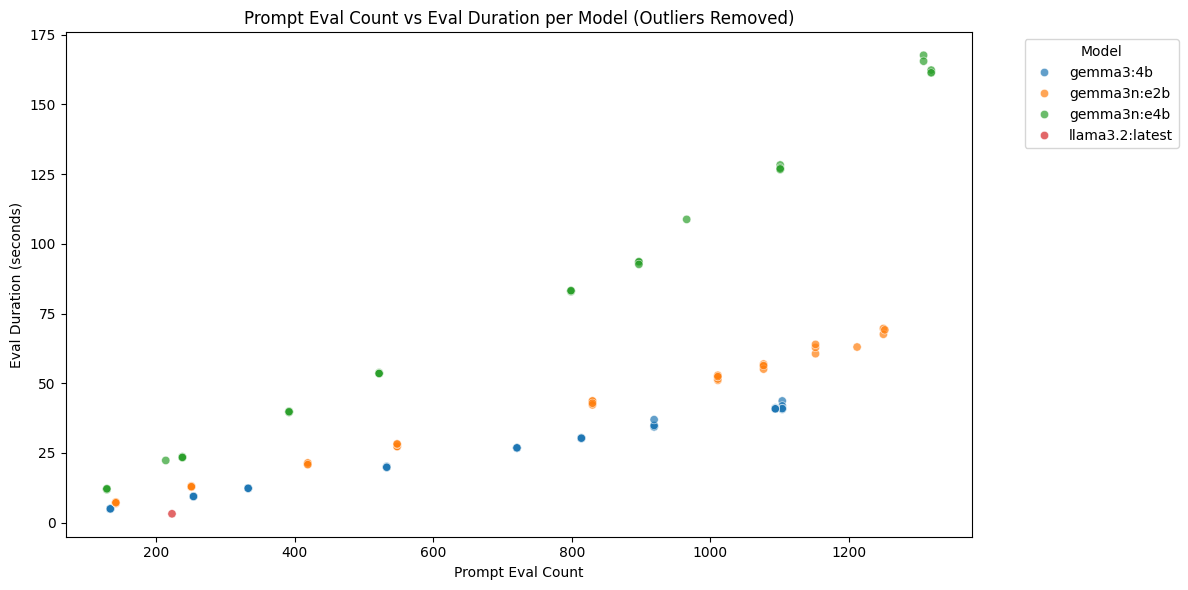

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and filter
df = df.dropna(subset=["prompt_eval_count", "eval_duration", "model"])
# df = df[df["prompt_eval_count"] < 2000]
# df = df[df["eval_duration"] < 50]

# Outlier removal per model using IQR
def remove_outliers(group):
    q1 = group["eval_duration"].quantile(0.25)
    q3 = group["eval_duration"].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return group[(group["eval_duration"] >= lower) & (group["eval_duration"] <= upper)]

df_filtered = df.groupby("model", group_keys=False).apply(remove_outliers)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_filtered,
    x="eval_count",
    y="eval_duration",
    hue="model",
    alpha=0.7
)

plt.title("Prompt Eval Count vs Eval Duration per Model (Outliers Removed)")
plt.xlabel("Prompt Eval Count")
plt.ylabel("Eval Duration (seconds)")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\w10\AppData\Local\Temp\ipykernel_13856\216914670.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered = df.groupby("model", group_keys=False).apply(remove_outliers)


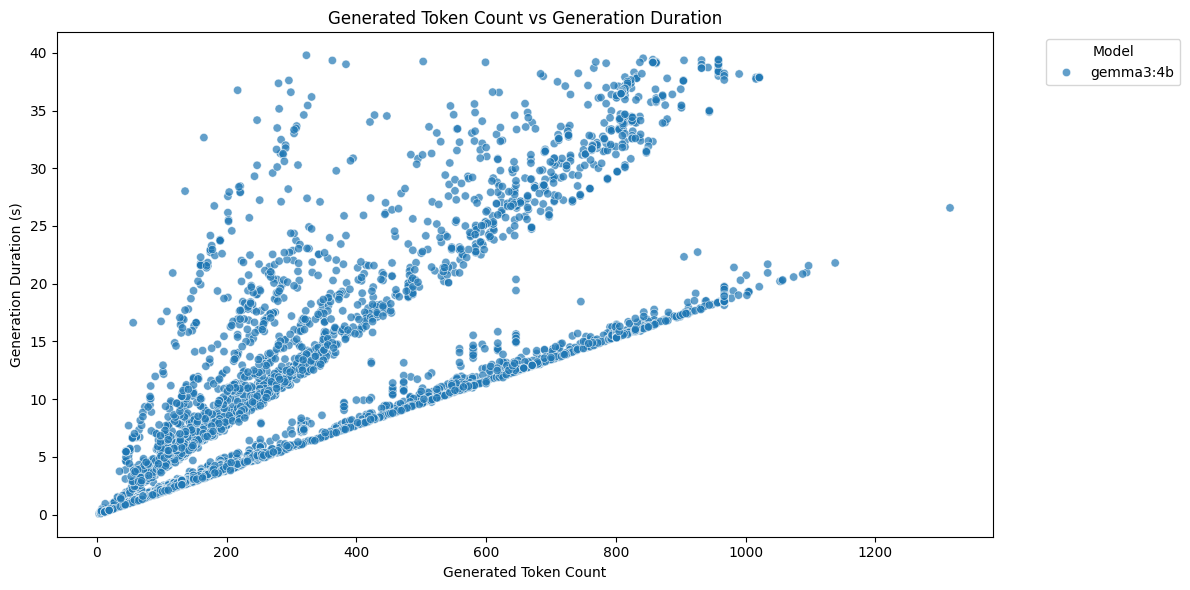

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and filter
df = df.dropna(subset=["prompt_eval_count", "eval_duration", "model"])
# df = df[df["prompt_eval_count"] < 2000]
# df = df[df["eval_duration"] < 50]

# Outlier removal per model using IQR
def remove_outliers(group):
    q1 = group["eval_duration"].quantile(0.25)
    q3 = group["eval_duration"].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return group[(group["eval_duration"] >= lower) & (group["eval_duration"] <= upper)]

df_filtered = df.groupby("model", group_keys=False).apply(remove_outliers)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_filtered.loc[df_filtered['model']=='gemma3:4b'],
    x="eval_count",
    y="eval_duration",
    hue="model",
    alpha=0.7
)

plt.title("Generated Token Count vs Generation Duration")
plt.xlabel("Generated Token Count")
plt.ylabel("Generation Duration (s)")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [5]:
df_filtered.loc[df_filtered['eval_count']>2000].iloc[0]['gen_text']

IndexError: single positional indexer is out-of-bounds

In [ ]:
df_filtered.loc[df_filtered['eval_count']>2000].iloc[1]['gen_text']

'{ "Player": "Player 2", "moves": {     "1": "Assess Damage & Prioritize Recovery: Immediately order a damage assessment of all units, focusing on those hit by the meteor shower. Prioritize repairing and redeploying vehicles and infantry, particularly those with compromised optics or exposed positions.",     "2": "Exploit Disruption: Recognizing the temporary disruption, rapidly shift forces to exploit the gaps created by the meteor shower’s impact.  Focus on consolidating gains near the most heavily damaged defensive positions.",     "3": "Artillery Adjustment:  Despite the disruption, maintain artillery fire on identified key defensive strongpoints, adjusting targeting based on the altered terrain and potential new weak points revealed by the meteor shower.",     "4": "Rapid Reconnaissance: Dispatch a fast-moving reconnaissance element – likely a combination of armored vehicles and scouts – to fully map the altered battlefield, identify any new defensive positions established by Play

In [ ]:
df_filtered.loc[df_filtered['eval_count']>2000].iloc[2]['gen_text']

'{   "Game Summary": "The game is a tactical conflict between two opposing forces (Player 1 and Player 2) operating within a defined environment (hedgerow terrain). The game is characterized by reactive responses to emergent events – a landslide causing a temporary disruption, followed by a minefield, and then a deliberate offensive by Player 2. Both sides are employing reconnaissance, defensive consolidation, and offensive maneuvers, with a strong emphasis on utilizing drones for observation and targeting. The game is progressing through a series of escalating engagements.",   "Player 1 Status": {     "Actions": [       "Immediate Casualty Assessment & Medical Support",       "Minefield Reconnaissance – Drone Deployment",       "Defensive Consolidation – Strengthen Hedgerow Defenses",       "Mobile Reserve – Combined Arms Group – Defensive Positioning – Prioritize Route Security",       "Artillery Support – Concentrated Fire on FOP",       "Immediate Casualty Assessment & Medical Supp

C:\Users\w10\AppData\Local\Temp\ipykernel_11948\1015302658.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered = df.groupby("model", group_keys=False).apply(remove_outliers)
h:\projects\ai_based\Agent-Factory\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


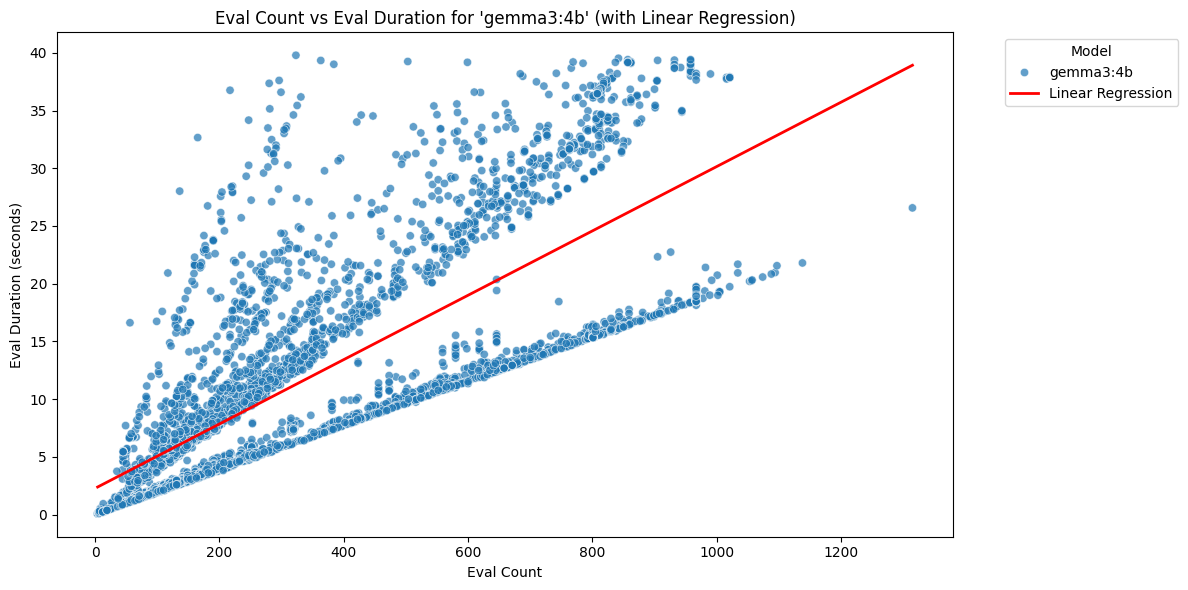

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Clean and filter
df = df.dropna(subset=["prompt_eval_count", "eval_duration", "model"])

# Outlier removal per model using IQR
def remove_outliers(group):
    q1 = group["eval_duration"].quantile(0.25)
    q3 = group["eval_duration"].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return group[(group["eval_duration"] >= lower) & (group["eval_duration"] <= upper)]

df_filtered = df.groupby("model", group_keys=False).apply(remove_outliers)

# Filter for the model of interest
model_df = df_filtered[df_filtered['model'] == 'gemma3:4b']

# Fit linear regression
X = model_df[["eval_count"]]
y = model_df["eval_duration"]

reg = LinearRegression()
reg.fit(X, y)

# Predict line for plotting
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_vals = reg.predict(x_vals)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=model_df,
    x="eval_count",
    y="eval_duration",
    hue="model",
    alpha=0.7
)

plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Linear Regression')

plt.title("Eval Count vs Eval Duration for 'gemma3:4b' (with Linear Regression)")
plt.xlabel("Eval Count")
plt.ylabel("Eval Duration (seconds)")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [38]:
import warnings
warnings.filterwarnings("ignore")
df_test = df_filtered[['eval_count','eval_duration']]
df_test.rename(columns = {'eval_count':'x',
                          'eval_duration':'y'}, inplace = True)
df_test['r'] = np.sqrt(df_test['x']**2 + df_test['y']**2)
df_test['x_norm'] = df_test['x']/df_test['r']
df_test['y_norm'] = df_test['y']/df_test['r']

In [39]:
df_test

,x,y,r,x_norm,y_norm
3975,914,9.06,914.044902,0.999951,0.009912
4195,1049,10.38,1049.051355,0.999951,0.009895
4198,896,8.81,896.043312,0.999952,0.009832
4209,889,8.87,889.044249,0.999950,0.009977
4212,889,8.79,889.043455,0.999951,0.009887
...,...,...,...,...,...
4017,381,6.06,381.048191,0.999874,0.015904
4018,381,6.04,381.047873,0.999874,0.015851
4019,381,6.14,381.049471,0.999870,0.016113
4020,381,6.12,381.049150,0.999871,0.016061


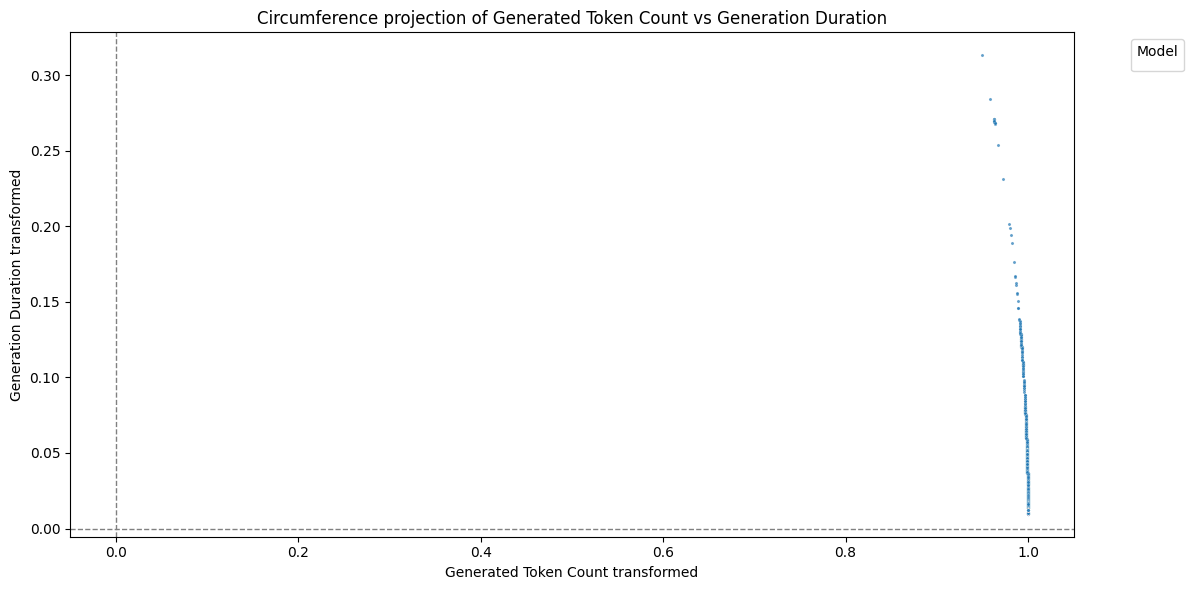

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_test,
    x="x_norm",
    y="y_norm",
    alpha=0.7,
    s = 5
)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title("Circumference projection of Generated Token Count vs Generation Duration")
plt.xlabel("Generated Token Count transformed")
plt.ylabel("Generation Duration transformed")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

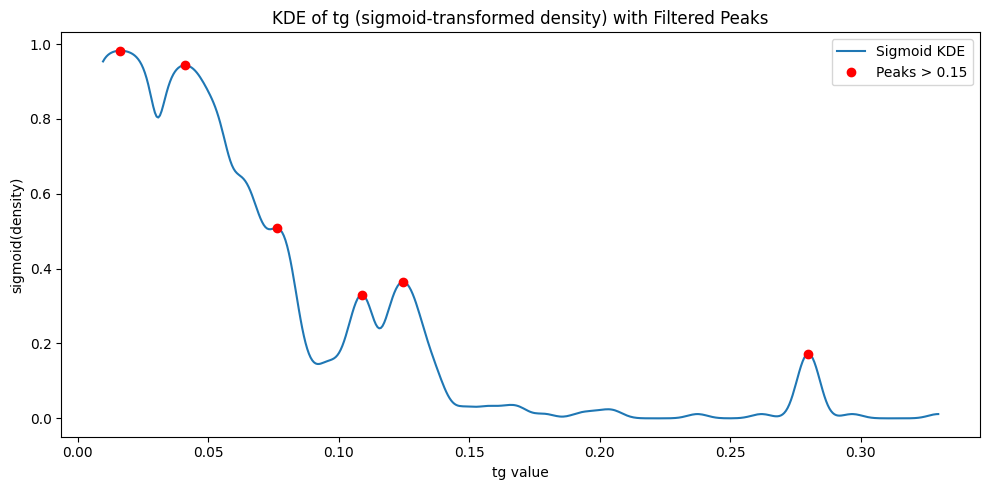

In [41]:
from scipy.stats import gaussian_kde

df_test['tg'] = df_test['y_norm']/df_test['x_norm']

x = df_test['tg'].dropna().values
kde = gaussian_kde(x)
x_vals = np.linspace(x.min(), x.max(), 500)
y_vals = kde(x_vals)

# Transformation
y_sigmoid = y_vals / (1 + y_vals) # Sigmoid-like compression

from scipy.signal import find_peaks

# Find peaks in the transformed KDE
peaks, _ = find_peaks(y_sigmoid)

filtered_peaks = peaks[y_sigmoid[peaks] > 0.15]
peak_tg_values = x_vals[filtered_peaks]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_sigmoid, label="Sigmoid KDE")
plt.plot(peak_tg_values, y_sigmoid[filtered_peaks], "ro", label="Peaks > 0.15")
plt.title("KDE of tg (sigmoid-transformed density) with Filtered Peaks")
plt.xlabel("tg value")
plt.ylabel("sigmoid(density)")
plt.legend()
plt.tight_layout()
plt.show()

# Print


In [42]:
peak_tg_values_radian = [np.arctan(tg) for tg in peak_tg_values]
peak_tg_values_degrees = [np.degrees(angles_rad) for angles_rad in peak_tg_values_radian]

In [43]:
for i,theta in enumerate(peak_tg_values_radian):
    df_test[f'theta_{i}_line_norm'] = df_test['x_norm']*np.tan(theta)
    df_test[f'theta_{i}_line'] = df_test['x']*np.tan(theta)
    
    


In [44]:
df_test

,x,y,r,x_norm,y_norm,tg,theta_0_line_norm,theta_0_line,theta_1_line_norm,theta_1_line,theta_2_line_norm,theta_2_line,theta_3_line_norm,theta_3_line,theta_4_line_norm,theta_4_line,theta_5_line_norm,theta_5_line
3975,914,9.06,914.044902,0.999951,0.009912,0.009912,0.016180,14.789409,0.041186,37.646081,0.076451,69.879850,0.109151,99.769344,0.124540,113.834989,0.279706,255.663570
4195,1049,10.38,1049.051355,0.999951,0.009895,0.009895,0.016180,16.973840,0.041186,43.206498,0.076451,80.201272,0.109151,114.505516,0.124540,130.648690,0.279706,293.425695
4198,896,8.81,896.043312,0.999952,0.009832,0.009833,0.016180,14.498151,0.041186,36.904692,0.076451,68.503660,0.109152,97.804521,0.124540,111.593162,0.279706,250.628620
4209,889,8.87,889.044249,0.999950,0.009977,0.009978,0.016180,14.384885,0.041186,36.616374,0.076451,67.968475,0.109151,97.040423,0.124540,110.721340,0.279706,248.670584
4212,889,8.79,889.043455,0.999951,0.009887,0.009888,0.016180,14.384885,0.041186,36.616374,0.076451,67.968475,0.109151,97.040423,0.124540,110.721340,0.279706,248.670584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,381,6.06,381.048191,0.999874,0.015904,0.015906,0.016179,6.164951,0.041183,15.692732,0.076445,29.129347,0.109143,41.588753,0.124530,47.452003,0.279684,106.573108
4018,381,6.04,381.047873,0.999874,0.015851,0.015853,0.016179,6.164951,0.041183,15.692732,0.076445,29.129347,0.109143,41.588753,0.124530,47.452003,0.279684,106.573108
4019,381,6.14,381.049471,0.999870,0.016113,0.016115,0.016179,6.164951,0.041183,15.692732,0.076445,29.129347,0.109143,41.588753,0.124530,47.452003,0.279683,106.573108
4020,381,6.12,381.049150,0.999871,0.016061,0.016063,0.016179,6.164951,0.041183,15.692732,0.076445,29.129347,0.109143,41.588753,0.124530,47.452003,0.279683,106.573108


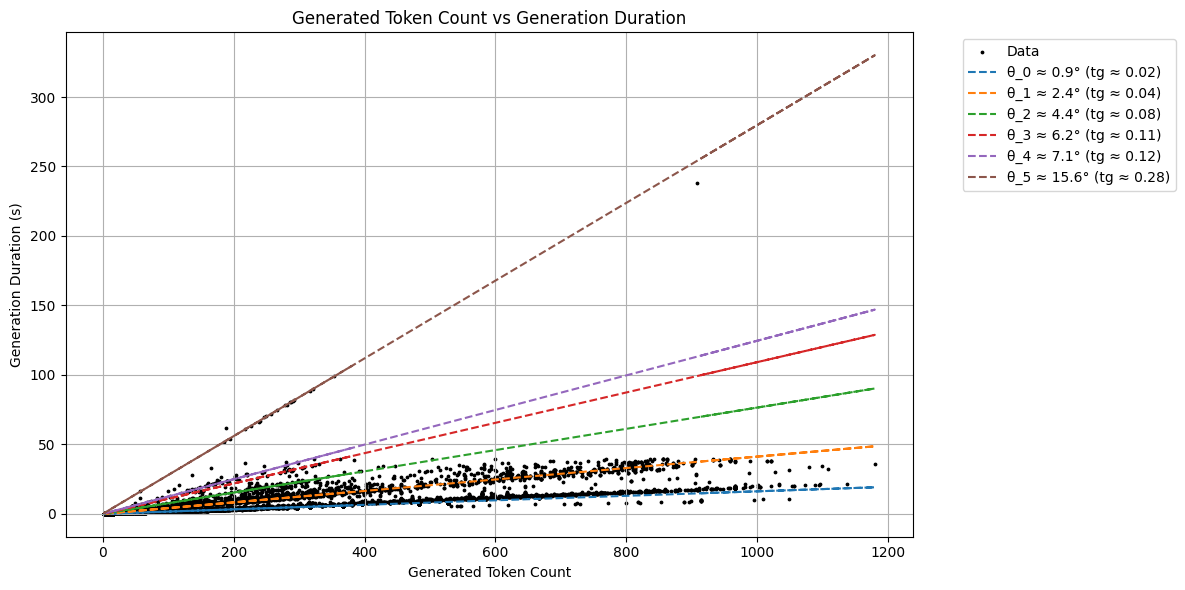

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_plot = df_test.loc[df_test['x']<1200]
# Scatter plot of actual data
plt.scatter(df_plot["x"], df_plot["y"], alpha=1, label="Data",s=3,color='black')

# Overlay each theta line
for i in range(len(peak_tg_values_radian)):
    theta_deg = np.degrees(peak_tg_values_radian[i])
    tg_val = np.tan(peak_tg_values_radian[i])
    plt.plot(
        df_plot["x"],
        df_plot[f"theta_{i}_line"],
        linestyle="--",
        label=f"θ_{i} ≈ {theta_deg:.1f}° (tg ≈ {tg_val:.2f})"
    )

# Plot settings
plt.title("Generated Token Count vs Generation Duration")
plt.xlabel("Generated Token Count")
plt.ylabel("Generation Duration (s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()
